# Data Description

# -------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df=pd.read_csv(r"C:\Users\sarkar\Desktop\final\all about projects\class assignment\churn\data set\customer_churn.csv")

In [3]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [4]:
df.shape

(900, 10)

In [5]:
df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [6]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


# Pre-processing 

In [8]:
df['Names'].unique()

array(['Cameron Williams', 'Kevin Mueller', 'Eric Lozano',
       'Phillip White', 'Cynthia Norton', 'Jessica Williams',
       'Eric Butler', 'Zachary Walsh', 'Ashlee Carr', 'Jennifer Lynch',
       'Paula Harris', 'Bruce Phillips', 'Craig Garner', 'Nicole Olson',
       'Harold Griffin', 'James Wright', 'Doris Wilkins',
       'Katherine Carpenter', 'Lindsay Martin', 'Kathy Curry',
       'Dean Miller', 'Kevin Ramos', 'Jennifer Wood', 'Paul Walker',
       'Lindsey Day', 'Steven Hernandez', 'Danielle Kirk', 'Troy Oliver',
       'Darlene Evans', 'Mrs. Sarah Morales', 'Laura Pierce',
       'Carla Ball', 'Robert Hill', 'Joseph Harrell', 'Tammy Shepherd',
       'Kelly Carroll', 'Heidi Munoz', 'Thomas Sawyer', 'Erin Rivera',
       'Raymond Berry', 'Patrick Bell', 'Jason Jones MD',
       'Jermaine Johnson', 'George Archer', 'Richard Fields',
       'Amanda Roberts', 'David Kennedy', 'Adam Waters',
       'Patricia Elliott', 'Summer Haley', 'Brittany Jackson',
       'Shawn Chavez', 'L

In [9]:
df.Onboard_date.unique()

array(['2013-08-30 07:00:40', '2013-08-13 00:38:46',
       '2016-06-29 06:20:07', '2014-04-22 12:43:12',
       '2016-01-19 15:31:15', '2009-03-03 23:13:37',
       '2016-12-05 03:35:43', '2006-03-09 14:50:20',
       '2011-09-29 05:47:23', '2006-03-28 15:42:45',
       '2016-11-13 13:13:01', '2015-05-28 12:14:03',
       '2011-02-16 08:10:47', '2012-11-22 05:35:03',
       '2015-03-28 02:13:44', '2015-07-22 08:38:40',
       '2006-09-03 06:13:55', '2006-10-22 04:42:38',
       '2015-10-07 00:27:10', '2014-11-06 23:47:14',
       '2013-05-30 00:42:13', '2016-11-17 14:37:01',
       '2006-03-27 20:52:42', '2012-01-02 05:08:52',
       '2007-01-07 01:21:47', '2015-04-05 15:57:24',
       '2007-07-31 06:39:54', '2006-07-30 15:27:23',
       '2011-04-25 02:53:25', '2009-03-25 06:10:01',
       '2011-12-26 22:06:03', '2016-12-28 04:07:38',
       '2010-11-16 13:22:18', '2010-01-23 07:15:58',
       '2011-03-06 01:34:58', '2011-04-05 00:21:51',
       '2009-10-15 17:14:01', '2008-10-06 17:1

In [10]:
df.Location.value_counts()

21267 Nixon Coves Moorestad, NH 93322-8817                  1
75224 Powell Point Apt. 653 Lake Norma, AZ 05753            1
85040 Denise Mills West Lynn, TN 21871                      1
3589 Ashley Crest Suite 345 North Jennifer, OH 77938        1
551 Davis Crescent New Aliciaport, TX 94552-1600            1
                                                           ..
8419 William Square Apt. 695 Martinville, RI 34133          1
2091 Antonio Tunnel Apt. 841 Gibsonburgh, GU 98706          1
755 Ashley Motorway Suite 227 West Rachel, NH 67933-7552    1
6431 Caldwell Spring Port Gregorymouth, VI 76545-9829       1
773 Davis Ways Apt. 519 West Jamesbury, AR 35583            1
Name: Location, Length: 900, dtype: int64

In [11]:
df.Company.unique()

array(['Harvey LLC', 'Wilson PLC', 'Miller, Johnson and Wallace',
       'Smith Inc', 'Love-Jones', 'Kelly-Warren', 'Reynolds-Sheppard',
       'Singh-Cole', 'Lopez PLC', 'Reed-Martinez',
       'Briggs, Lamb and Mathews', 'Figueroa-Maynard', 'Abbott-Thompson',
       'Smith, Kim and Marshall', 'Snyder, Lee and Morris',
       'Sanders-Pierce', 'Andrews, Adams and Davis',
       'Morgan, Phillips and Harrell', 'Villanueva LLC',
       'Berry, Orr and Cabrera', 'Parks-Bradley', 'Olsen LLC',
       'Clark, Campbell and Armstrong', 'Dalton LLC',
       'Thompson, Hansen and Sanchez', 'Yates, Martinez and Cox',
       'Reeves-Curtis', 'Gates Ltd', 'Dunlap and Sons',
       'Taylor, Allen and Gardner', 'Charles-Branch', 'Barton Inc',
       'Stevens, Harris and Greene', 'Fitzgerald, Sherman and Lowe',
       'Martin Ltd', 'Juarez, Pugh and Vargas', 'Mckinney-Rogers',
       'Lopez, Kelly and Armstrong', 'Wilkins, White and Martin',
       'Evans, Logan and Wilson', 'Clark-Kramer', 'Brown-Ri

In [12]:
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

# No null values to treat 

# ---------------------------------------------------------------------------------------------------------------

# EDA

In [13]:
df.Churn.value_counts()

0    750
1    150
Name: Churn, dtype: int64

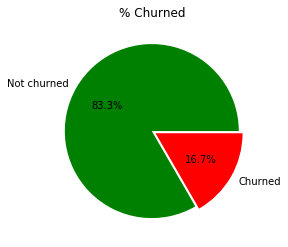

In [14]:
plt.pie(
    [750,150],
    explode=[0,0.05],
    labels=["Not churned","Churned"],
    autopct='%1.1f%%',
    colors=["Green","Red"]
    
)
plt.title("% Churned")
plt.show()

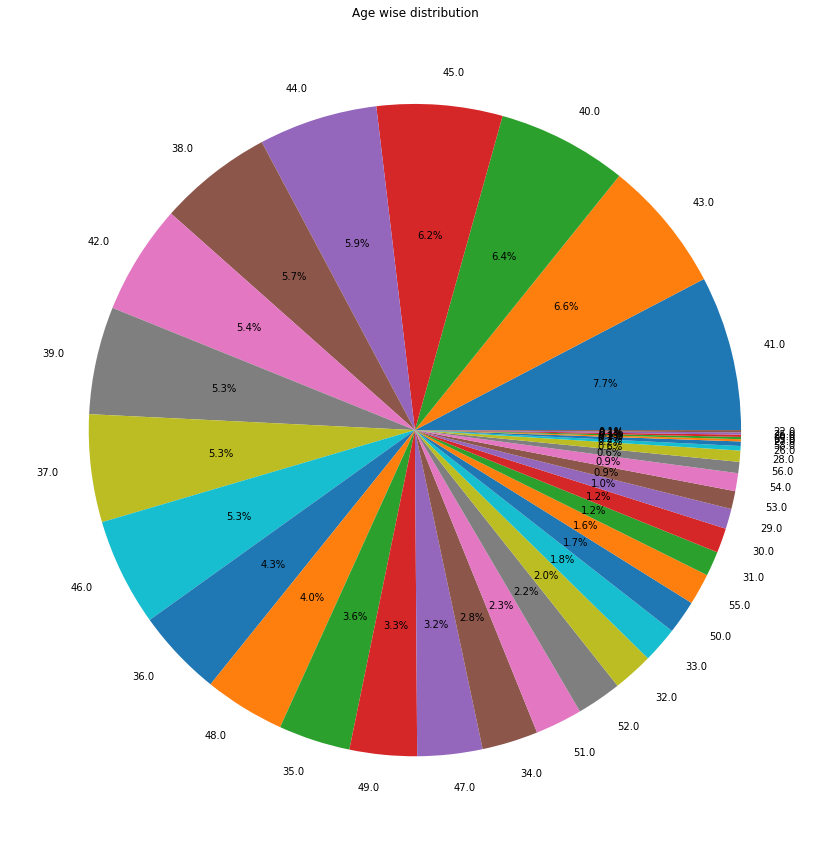

In [15]:
pie=pd.DataFrame(df.Age.value_counts())
fig = plt.figure(figsize=(15,15))
plt.pie(
    pie.Age,
    explode=None,
    labels=pie.index,
    autopct='%1.1f%%',
    
)
plt.title("Age wise distribution")
plt.show()

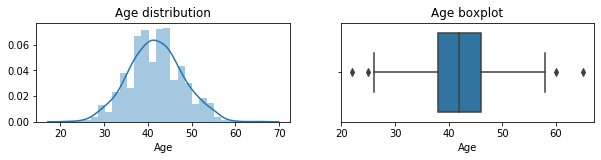

In [16]:
#Age vs churn 

fig = plt.figure(figsize=(10,4))

plt.subplot(2, 2, 1)
sns.distplot(df.Age)
plt.title("Age distribution")

plt.subplot(2, 2, 2)
sns.boxplot(df.Age)
plt.title("Age boxplot")


plt.show()

In [17]:
df.Age.describe() 

count    900.000000
mean      41.816667
std        6.127560
min       22.000000
25%       38.000000
50%       42.000000
75%       46.000000
max       65.000000
Name: Age, dtype: float64

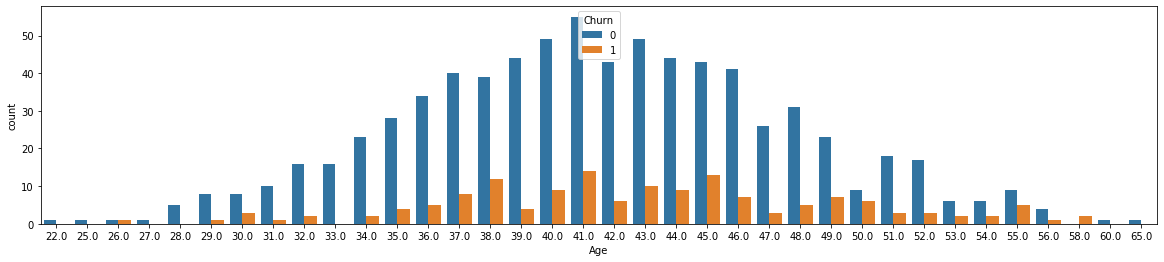

In [18]:

fig = plt.figure(figsize=(20,4))
sns.countplot(df.Age,hue=df.Churn)

In [19]:
pie.index

Float64Index([41.0, 43.0, 40.0, 45.0, 44.0, 38.0, 42.0, 39.0, 37.0, 46.0, 36.0,
              48.0, 35.0, 49.0, 47.0, 34.0, 51.0, 52.0, 32.0, 33.0, 50.0, 55.0,
              31.0, 30.0, 29.0, 53.0, 54.0, 56.0, 28.0, 26.0, 58.0, 27.0, 65.0,
              60.0, 25.0, 22.0],
             dtype='float64')

In [20]:
age_41=pd.DataFrame(df[df.Age==41].Churn.value_counts())
age_43=pd.DataFrame(df[df.Age==43].Churn.value_counts())
age_40=pd.DataFrame(df[df.Age==40].Churn.value_counts())
age_45=pd.DataFrame(df[df.Age==45].Churn.value_counts())
age_44=pd.DataFrame(df[df.Age==44].Churn.value_counts())
age_38=pd.DataFrame(df[df.Age==38].Churn.value_counts())
age_42=pd.DataFrame(df[df.Age==42].Churn.value_counts())
age_39=pd.DataFrame(df[df.Age==39].Churn.value_counts())
age_37=pd.DataFrame(df[df.Age==37].Churn.value_counts())
age_46=pd.DataFrame(df[df.Age==46].Churn.value_counts())
age_36=pd.DataFrame(df[df.Age==36].Churn.value_counts())
age_48=pd.DataFrame(df[df.Age==48].Churn.value_counts())
age_35=pd.DataFrame(df[df.Age==35].Churn.value_counts())
age_49=pd.DataFrame(df[df.Age==49].Churn.value_counts())
age_47=pd.DataFrame(df[df.Age==47].Churn.value_counts())
age_34=pd.DataFrame(df[df.Age==34].Churn.value_counts())
age_51=pd.DataFrame(df[df.Age==51].Churn.value_counts())
age_52=pd.DataFrame(df[df.Age==52].Churn.value_counts())
age_32=pd.DataFrame(df[df.Age==32].Churn.value_counts())
age_33=pd.DataFrame(df[df.Age==33].Churn.value_counts())
age_50=pd.DataFrame(df[df.Age==50].Churn.value_counts())
age_55=pd.DataFrame(df[df.Age==55].Churn.value_counts())
age_31=pd.DataFrame(df[df.Age==31].Churn.value_counts())
age_30=pd.DataFrame(df[df.Age==30].Churn.value_counts())
age_29=pd.DataFrame(df[df.Age==29].Churn.value_counts())
age_53=pd.DataFrame(df[df.Age==53].Churn.value_counts())
age_54=pd.DataFrame(df[df.Age==54].Churn.value_counts())
age_56=pd.DataFrame(df[df.Age==56].Churn.value_counts())
age_28=pd.DataFrame(df[df.Age==28].Churn.value_counts())
age_26=pd.DataFrame(df[df.Age==26].Churn.value_counts())
age_58=pd.DataFrame(df[df.Age==58].Churn.value_counts())
age_27=pd.DataFrame(df[df.Age==27].Churn.value_counts())
age_65=pd.DataFrame(df[df.Age==65].Churn.value_counts())
age_60=pd.DataFrame(df[df.Age==60].Churn.value_counts())
age_25=pd.DataFrame(df[df.Age==25].Churn.value_counts())
age_22=pd.DataFrame(df[df.Age==22].Churn.value_counts())

In [21]:
age_41

,Churn
0,55
1,14


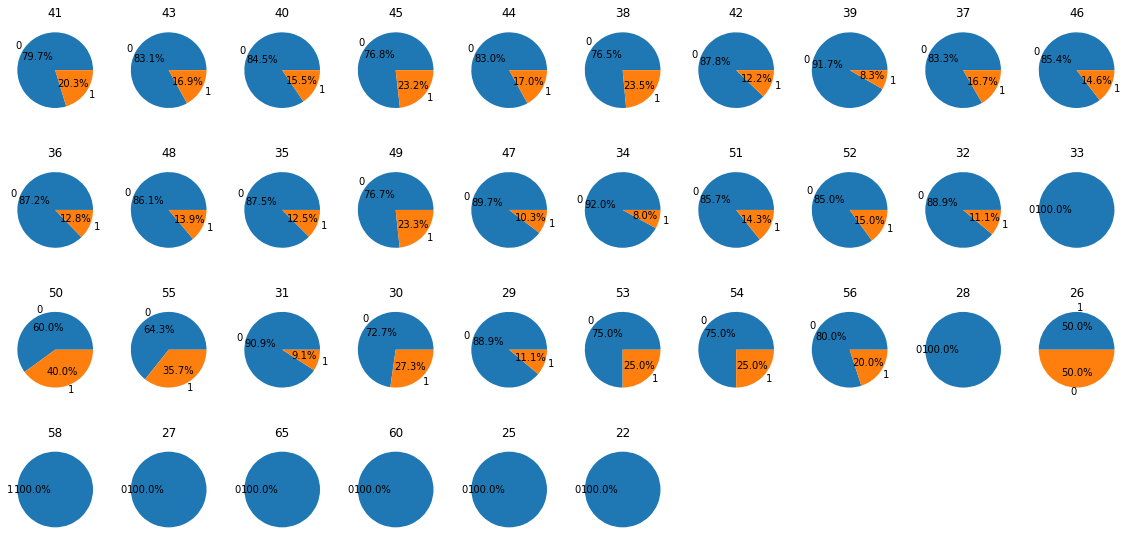

In [22]:
fig = plt.figure(figsize=(20,15))

plt.subplot(6, 10, 1)
plt.pie(
    age_41.Churn,
    explode=None,
    labels=age_41.index,
    autopct='%1.1f%%',
    
)
plt.title("41")

plt.subplot(6, 10, 2)
plt.pie(
    age_43.Churn,
    explode=None,
    labels=age_43.index,
    autopct='%1.1f%%',
    
)
plt.title("43")



plt.subplot(6, 10, 3)
plt.pie(
    age_40.Churn,
    explode=None,
    labels=age_40.index,
    autopct='%1.1f%%',
    
)
plt.title("40")
plt.subplot(6, 10, 4)
plt.pie(
    age_45.Churn,
    explode=None,
    labels=age_45.index,
    autopct='%1.1f%%',
    
)
plt.title("45")
plt.subplot(6, 10, 5)
plt.pie(
    age_44.Churn,
    explode=None,
    labels=age_44.index,
    autopct='%1.1f%%',
    
)
plt.title("44")
plt.subplot(6, 10, 6)
plt.pie(
    age_38.Churn,
    explode=None,
    labels=age_38.index,
    autopct='%1.1f%%',
    
)
plt.title("38")
plt.subplot(6, 10, 7)
plt.pie(
    age_42.Churn,
    explode=None,
    labels=age_42.index,
    autopct='%1.1f%%',
    
)
plt.title("42")
plt.subplot(6, 10, 8)
plt.pie(
    age_39.Churn,
    explode=None,
    labels=age_39.index,
    autopct='%1.1f%%',
    
)
plt.title("39")
plt.subplot(6, 10, 9)
plt.pie(
    age_37.Churn,
    explode=None,
    labels=age_37.index,
    autopct='%1.1f%%',
    
)
plt.title("37")
plt.subplot(6, 10, 10)
plt.pie(
    age_46.Churn,
    explode=None,
    labels=age_46.index,
    autopct='%1.1f%%',
    
)
plt.title("46")

plt.subplot(6, 10, 11)
plt.pie(
    age_36.Churn,
    explode=None,
    labels=age_36.index,
    autopct='%1.1f%%',
    
)
plt.title("36")

plt.subplot(6, 10, 12)
plt.pie(
    age_48.Churn,
    explode=None,
    labels=age_48.index,
    autopct='%1.1f%%',
    
)
plt.title("48")

plt.subplot(6, 10, 13)
plt.pie(
    age_35.Churn,
    explode=None,
    labels=age_35.index,
    autopct='%1.1f%%',
    
)
plt.title("35")

plt.subplot(6, 10, 14)
plt.pie(
    age_49.Churn,
    explode=None,
    labels=age_49.index,
    autopct='%1.1f%%',
    
)
plt.title("49")
plt.subplot(6, 10, 15)
plt.pie(
    age_47.Churn,
    explode=None,
    labels=age_47.index,
    autopct='%1.1f%%',
    
)
plt.title("47")
plt.subplot(6, 10, 16)
plt.pie(
    age_34.Churn,
    explode=None,
    labels=age_34.index,
    autopct='%1.1f%%',
    
)
plt.title("34")
plt.subplot(6, 10, 17)
plt.pie(
    age_51.Churn,
    explode=None,
    labels=age_51.index,
    autopct='%1.1f%%',
    
)
plt.title("51")
plt.subplot(6, 10, 18)
plt.pie(
    age_52.Churn,
    explode=None,
    labels=age_52.index,
    autopct='%1.1f%%',
    
)
plt.title("52")
plt.subplot(6, 10, 19)
plt.pie(
    age_32.Churn,
    explode=None,
    labels=age_32.index,
    autopct='%1.1f%%',
    
)
plt.title("32")
plt.subplot(6, 10, 20)
plt.pie(
    age_33.Churn,
    explode=None,
    labels=age_33.index,
    autopct='%1.1f%%',
    
)
plt.title("33")
plt.subplot(6, 10, 21)
plt.pie(
    age_50.Churn,
    explode=None,
    labels=age_50.index,
    autopct='%1.1f%%',
    
)
plt.title("50")
plt.subplot(6, 10, 22)
plt.pie(
    age_55.Churn,
    explode=None,
    labels=age_55.index,
    autopct='%1.1f%%',
    
)
plt.title("55")
plt.subplot(6, 10, 23)
plt.pie(
    age_31.Churn,
    explode=None,
    labels=age_31.index,
    autopct='%1.1f%%',
    
)
plt.title("31")
plt.subplot(6, 10, 24)
plt.pie(
    age_30.Churn,
    explode=None,
    labels=age_30.index,
    autopct='%1.1f%%',
    
)
plt.title("30")
plt.subplot(6, 10, 25)
plt.pie(
    age_29.Churn,
    explode=None,
    labels=age_29.index,
    autopct='%1.1f%%',
    
)
plt.title("29")
plt.subplot(6, 10, 26)
plt.pie(
    age_53.Churn,
    explode=None,
    labels=age_53.index,
    autopct='%1.1f%%',
    
)
plt.title("53")
plt.subplot(6, 10, 27)
plt.pie(
    age_54.Churn,
    explode=None,
    labels=age_54.index,
    autopct='%1.1f%%',
    
)
plt.title("54")
plt.subplot(6, 10, 28)
plt.pie(
    age_56.Churn,
    explode=None,
    labels=age_56.index,
    autopct='%1.1f%%',
    
)
plt.title("56")
plt.subplot(6, 10, 29)
plt.pie(
    age_28.Churn,
    explode=None,
    labels=age_28.index,
    autopct='%1.1f%%',
    
)
plt.title("28")
plt.subplot(6, 10, 30)
plt.pie(
    age_26.Churn,
    explode=None,
    labels=age_26.index,
    autopct='%1.1f%%',
    
)
plt.title("26")
plt.subplot(6, 10, 31)
plt.pie(
    age_58.Churn,
    explode=None,
    labels=age_58.index,
    autopct='%1.1f%%',
    
)
plt.title("58")
plt.subplot(6, 10, 32)
plt.pie(
    age_27.Churn,
    explode=None,
    labels=age_27.index,
    autopct='%1.1f%%',
    
)
plt.title("27")
plt.subplot(6, 10, 33)
plt.pie(
    age_65.Churn,
    explode=None,
    labels=age_65.index,
    autopct='%1.1f%%',
    
)
plt.title("65")
plt.subplot(6, 10, 34)
plt.pie(
    age_60.Churn,
    explode=None,
    labels=age_60.index,
    autopct='%1.1f%%',
    
)
plt.title("60")
plt.subplot(6, 10, 35)
plt.pie(
    age_25.Churn,
    explode=None,
    labels=age_25.index,
    autopct='%1.1f%%',
    
)
plt.title("25")
plt.subplot(6, 10, 36)
plt.pie(
    age_22.Churn,
    explode=None,
    labels=age_22.index,
    autopct='%1.1f%%',
    
)
plt.title("22")
plt.show()

# -------------------------------------------------------------------------------------------------------------

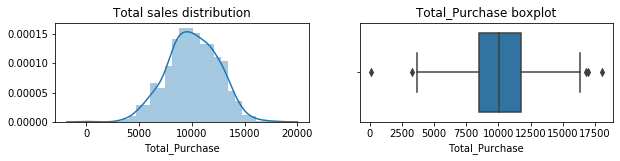

In [23]:
#Total_Purchase vs Churn

fig = plt.figure(figsize=(10,4))

plt.subplot(2, 2, 1)
sns.distplot(df.Total_Purchase)
plt.title("Total sales distribution")

plt.subplot(2, 2, 2)
sns.boxplot(df.Total_Purchase)
plt.title("Total_Purchase boxplot")


plt.show()

In [24]:
df.Total_Purchase.describe()

count      900.000000
mean     10062.824033
std       2408.644532
min        100.000000
25%       8497.122500
50%      10045.870000
75%      11760.105000
max      18026.010000
Name: Total_Purchase, dtype: float64

In [25]:
df.groupby("Churn")["Total_Purchase"].mean()

Churn
0    10036.952853
1    10192.179933
Name: Total_Purchase, dtype: float64

# -----------------------------------------------------------------------------------------------------------

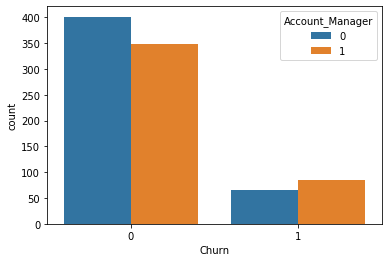

In [26]:
#Account_Manager vs Churn
sns.countplot(df.Churn,hue=df.Account_Manager)

# -------------------------------------------------------------------------------------------------------------

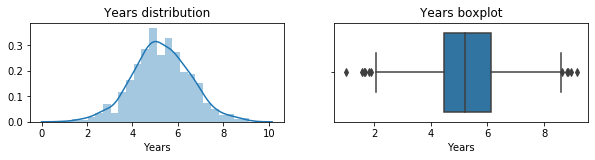

In [27]:
#Years vs Churn
fig = plt.figure(figsize=(10,4))

plt.subplot(2, 2, 1)
sns.distplot(df.Years)
plt.title("Years distribution")

plt.subplot(2, 2, 2)
sns.boxplot(df.Years)
plt.title("Years boxplot")


plt.show()

In [28]:
df0_2=df[(df.Years>=0) & (df.Years<=2)]
df2_4=df[(df.Years>2) & (df.Years<=4)]
df4_6=df[(df.Years>4) & (df.Years<=6)]
df6_8=df[(df.Years>6) & (df.Years<=8)]
df8_10=df[(df.Years>8) & (df.Years<=10)]

In [29]:
df0_2.Churn.value_counts()


0    6
Name: Churn, dtype: int64

In [30]:
df2_4.Churn.value_counts()

0    124
1      6
Name: Churn, dtype: int64

In [31]:
df4_6.Churn.value_counts()

0    437
1     83
Name: Churn, dtype: int64

In [32]:
df6_8.Churn.value_counts()

0    172
1     54
Name: Churn, dtype: int64

In [33]:
df8_10.Churn.value_counts()

0    11
1     7
Name: Churn, dtype: int64

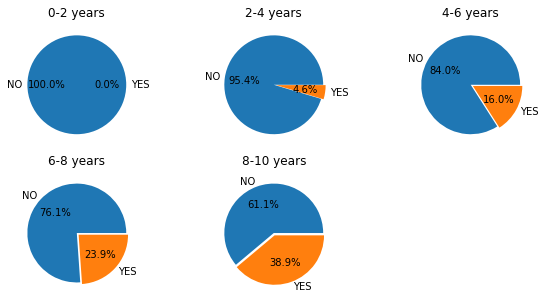

In [34]:
fig = plt.figure(figsize=(10,5))

plt.subplot(2, 3, 1)
plt.pie(
    [6,0],
    explode=None,
    labels=["NO","YES"],
    autopct='%1.1f%%',
    
)
plt.title("0-2 years")
plt.subplot(2, 3, 2)
plt.pie(
    [124,6],
    explode=[0,0.05],
    labels=["NO","YES"],
    autopct='%1.1f%%',
    
)
plt.title("2-4 years")
plt.subplot(2, 3, 3)
plt.pie(
    [437,83],
    explode=[0,0.05],
    labels=["NO","YES"],
    autopct='%1.1f%%',
    
)
plt.title("4-6 years")
plt.subplot(2, 3, 4)
plt.pie(
    [172,54],
    explode=[0,0.05],
    labels=["NO","YES"],
    autopct='%1.1f%%',
    
)
plt.title("6-8 years")
plt.subplot(2, 3, 5)
plt.pie(
    [11,7],
    explode=[0,0.05],
    labels=["NO","YES"],
    autopct='%1.1f%%',
    
)
plt.title("8-10 years")

plt.show()

# --------------------------------------------------------------------------------------------------------------

In [35]:
df.Num_Sites.value_counts()

8.0     213
9.0     186
7.0     146
10.0    131
11.0     83
6.0      67
12.0     32
5.0      22
13.0      8
14.0      6
4.0       4
3.0       2
Name: Num_Sites, dtype: int64

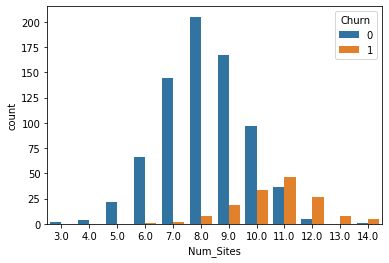

In [36]:
sns.countplot(df.Num_Sites,hue=df.Churn)

# --------------------------------------------------------------------------------------------------------------